## 4 Arten von MRI-Bilddaten

1. **ADC (Apparent Diffusion Coefficient) Maps (`*_ADC.nii.gz`)**: ADC-Karten quantifizieren die Bewegung von Wassermolekülen im Gewebe, wobei eingeschränkte Diffusion dunkler dargestellt wird, nützlich für die Erkennung von Schlaganfällen.

2. **TRACE-Weighted Images (`*_TRACEW.nii.gz`)**: TRACE-Weighted Images bieten eine richtungsunabhängige Darstellung der Diffusion, indem sie Diffusionsgewichtete Bilder in allen Richtungen mitteln.

3. **3D FLAIR Sequenzen (`*_flair.nii.gz`)**: FLAIR-Bilder unterdrücken das Signal von Flüssigkeiten zur verbesserten Sichtbarkeit von Läsionen in oder nahe der Zerebrospinalflüssigkeit.

4. **T2-gewichtete Turbo Spin Echo Sequenzen (`*_t2_tse.nii.gz`)**: T2-gewichtete Bilder heben den Wassergehalt von Gewebe hervor, was sie ideal macht für die Visualisierung von Ödemen, Entzündungen und einigen Tumoren.

Installieren der relevanten Libraries:

In [ ]:
!pip install nibabel
!pip install matplotlib

Funktion zum Visualisieren (vorher/nachher)

In [2]:
# Visualisationsfunktion

import nibabel as nib
import matplotlib.pyplot as plt

def visualize_middle_slice(nifti_file_path):
    """
    Visualisiert die mittlere Scheibe einer NIfTI-Bilddatei.

    :param nifti_file_path: String (Pfad).
    """
    # Laden der NIfTI-Datei
    nifti_file = nib.load(nifti_file_path)
    
    # Umwandeln der Bilddaten in ein NumPy-Array
    image_data = nifti_file.get_fdata()
    
    # mittlere Scheibe aus der z-Achse (Achse 2)
    middle_index = image_data.shape[2] // 2
    middle_slice = image_data[:, :, middle_index]
    
    # Darstellung der mittleren Scheibe
    plt.imshow(middle_slice.T, cmap="gray", origin="lower")
    plt.axis('off')  # Achsen nicht anzeigen
    plt.show()

Vorher:

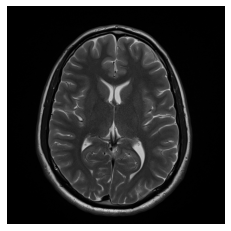

In [5]:
visualize_middle_slice('/home/stuhllin/FSL_try/sample_1/ANONYM-8TMMOB_1_t2_tse_tra.nii.gz')

**Erster Versuch Skull Stripping mit FSL Software über Shell Command.**

FSL wurde zuvor von https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FslInstallation/Linux#Running_the_programs heruntergeladen und installiert. Kann mit simplen Shell Befehlen ausgeführt werden.

**Parameter BET Tool:**

-o Erzeugt eine Kontur des Gehirns, die über das Originalbild gelegt wird.

-m Erzeugt eine binäre Maske des Gehirns.

-s Erzeugt ein grobes Bild des Schädels (nicht so sauber wie das, was betsurf generiert).

-n Erzeugt nicht das standardmäßige Ausgabebild des Gehirns.

-f Fraktionierungsintensitätsschwelle (0->1); Standardwert=0.5; kleinere Werte führen zu grösseren Schätzungen der Gehirnkontur.

-g Vertikaler Gradient in der Fraktionierungsintensitätsschwelle (-1->1); Standardwert=0; positive Werte führen zu einer grösseren Gehirnkontur am unteren Rand, kleiner am oberen.

-r Kopfradius (in mm, nicht Voxel); die anfängliche Oberflächenkugel wird auf die Hälfte dieses Werts eingestellt.

-c < x y z> Schwerpunkt (in Voxel, nicht mm) der anfänglichen Maschenoberfläche.

-t Wendet Schwellenwertbildung auf das segmentierte Gehirnbild und die Maske an.

-e Erzeugt die Gehirnoberfläche als Maschenmodell im .vtk-Format.

In [24]:
import subprocess

input_file = '/home/stuhllin/FSL_try/sample_1/ANONYM-8TMMOB_1_t2_tse_tra.nii.gz'
output_file = '/home/stuhllin/FSL_try/sample_1/output_brain_extracted_image.nii.gz'

# Erstellen des BET-Shell-Command
bet_command = f'bet {input_file} {output_file} -f 0.2 -g 0'

# Ausführen
subprocess.run(bet_command, shell=True, check=True)

print(f'Skull stripping completed: {output_file}')

Skull stripping completed: /home/stuhllin/files/1/output_brain_extracted_image2.nii.gz


Nachher:

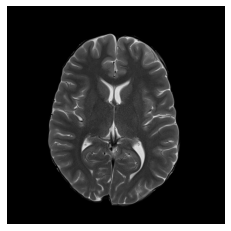

In [3]:
visualize_middle_slice('/home/stuhllin/FSL_try/sample_1/output_brain_extracted_image.nii.gz')